# AdaBoostClassifier w/ GridSearchCV (Cancer Dataset) #

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [52]:
# Load data
data = load_breast_cancer(as_frame=True)
df = data.frame

df.shape
df.head()
df.info()

(569, 31)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [53]:
X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((569, 30), (569,))

In [54]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    , stratify=y
    , random_state=27
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [60]:
# Base stump to be used in the grid
stump = DecisionTreeClassifier(random_state=27)

# Construct parameter grid
param_grid = {
    'n_estimators': [10, 30, 50, 100]
    , 'learning_rate': [0.1, 0.5, 1.0]
    , 'estimator__max_depth': [1, 2]
}

# Set up AdaBoost with a decision stump (base estimator)
ada = AdaBoostClassifier(
    estimator=stump
    , random_state=27
)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ada
    , param_grid=param_grid
    , scoring='accuracy'
#     , n_jobs=-1 # *This may generate an error w/some data; if so, just comment out (slow model > no model!)
    , cv=5
)

In [61]:
# Run grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=27),
                                          random_state=27),
             param_grid={'estimator__max_depth': [1, 2],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='accuracy')

In [62]:
# Best parameters and estimator
grid_search.best_params_
grid_search.best_score_

{'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 100}

0.9670329670329669

In [63]:
# Initialize and fit the 'best model' then see how the best boosted model does on test data:

best_ada_boost = grid_search.best_estimator_
best_ada_boost.fit(X_train, y_train)
best_ada_boost.score(X_test, y_test)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=27),
                   n_estimators=100, random_state=27)

0.9649122807017544

In [66]:
# Test the base for shytes n giggles:

ada.fit(X_train, y_train)
ada.score(X_test, y_test)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=27),
                   random_state=27)

0.9385964912280702

In [64]:
# See how the best boosted model does on test data:

# Predict on test set
y_pred = best_ada_boost.predict(X_test)
score_best = accuracy_score(y_test, y_pred)
score_best

0.9649122807017544

In [67]:
# Eval performance of base to see how much better the 'best_model' is;
y_pred_base = ada.predict(X_test)
score_base = accuracy_score(y_test, y_pred_base)
score_base

0.9385964912280702

In [70]:
mod_diff = np.round(((best_ada_boost.score(X_test, y_test) - ada.score(X_test, y_test))* 100), 4)

print(f"Best Model vs. Base Model (Raw Score) : {mod_diff}%")

Best Model vs. Base Model (Raw Score) : 2.6316%


In [76]:
print(f"Best Model vs. Base Model (Accuracy Score) : {np.round((((score_best - score_base) / score_base) * 100), 4)}%")

Best Model vs. Base Model (Accuracy Score) : 2.8037%


In [83]:
from sklearn.metrics import (
    confusion_matrix
    , classification_report 
    , ConfusionMatrixDisplay 
    , roc_auc_score 
    , RocCurveDisplay 
    , PrecisionRecallDisplay )

In [78]:
# Comparison of CMs (tex/array, non-viz) for Best vs. Base:

print("Confusion Matrix, Best Model:")
confusion_matrix(y_test, y_pred)
print('\n')
print("Confusion Matrix, Base Model:")
confusion_matrix(y_test, y_pred_base)

Confusion Matrix, Best Model:


array([[38,  4],
       [ 0, 72]])



Confusion Matrix, Base Model:


array([[40,  2],
       [ 5, 67]])

In [77]:
# Comparison of classification reports for Best vs. Base:

print("Classification Report, Best Model:")
print(classification_report(y_test, y_pred))
print('\n')
print("Classification Report, Base Model:")
print(classification_report(y_test, y_pred_base))

Classification Report, Best Model:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Classification Report, Base Model:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      0.93      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



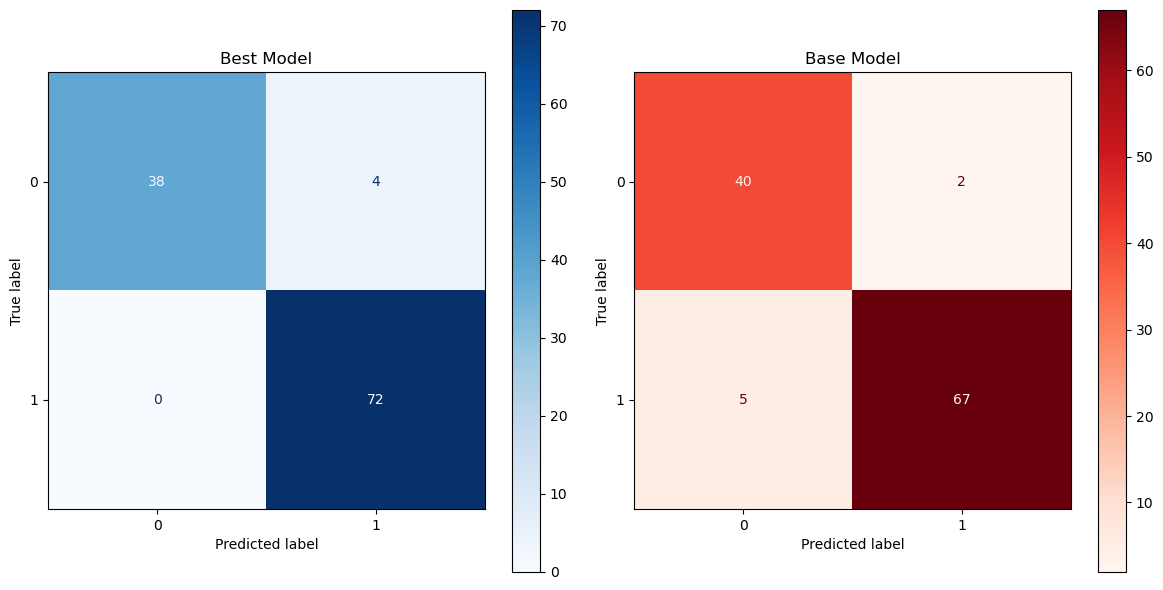

In [79]:
# To do a side-by-side, numerical CM comparison (Best vs. Base):

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay.from_estimator(
    best_ada_boost, X_test, y_test, cmap='Blues', ax=ax[0]
)

ConfusionMatrixDisplay.from_estimator(
    ada, X_test, y_test, cmap='Reds', ax=ax[1]
)

ax[0].set_title('Best Model')
ax[1].set_title('Base Model')

plt.tight_layout()
plt.show();

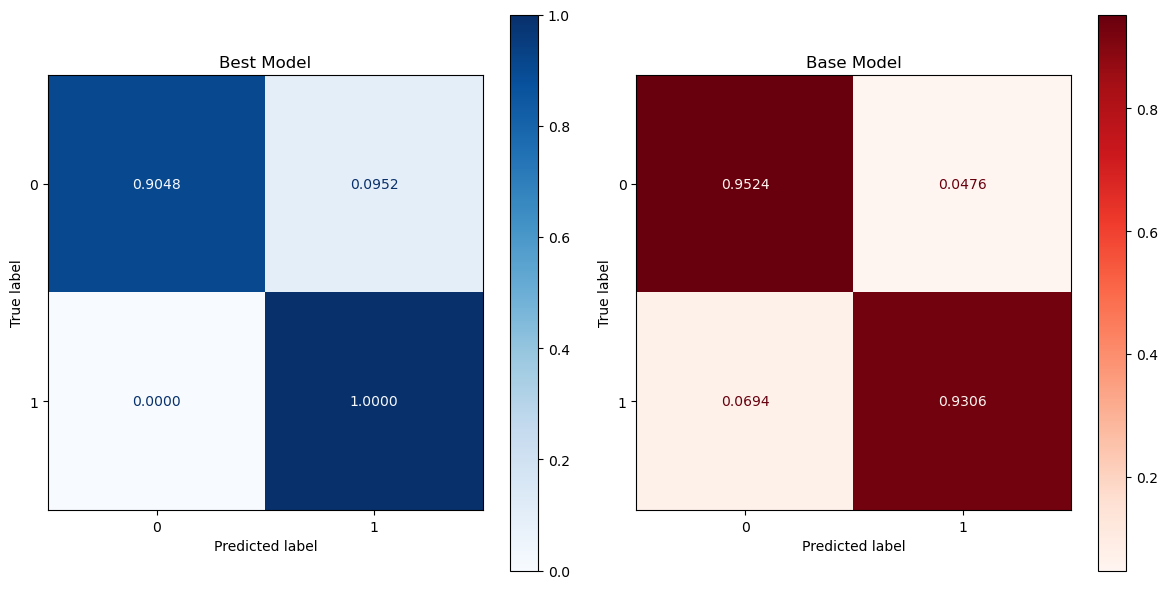

In [81]:
# To do a side-by-side, normalized CM comparison (Best vs. Base):

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay.from_estimator(
    best_ada_boost, X_test, y_test, normalize='true', cmap='Blues', values_format='.4f'
    , ax=ax[0]
)

ConfusionMatrixDisplay.from_estimator(
    ada, X_test, y_test, normalize='true', cmap='Reds', values_format='.4f'
    , ax=ax[1]
)

ax[0].set_title('Best Model')
ax[1].set_title('Base Model')

plt.tight_layout()
plt.show();

In [27]:
# Evaluation metrics
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.9649122807017544

array([[38,  4],
       [ 0, 72]])

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



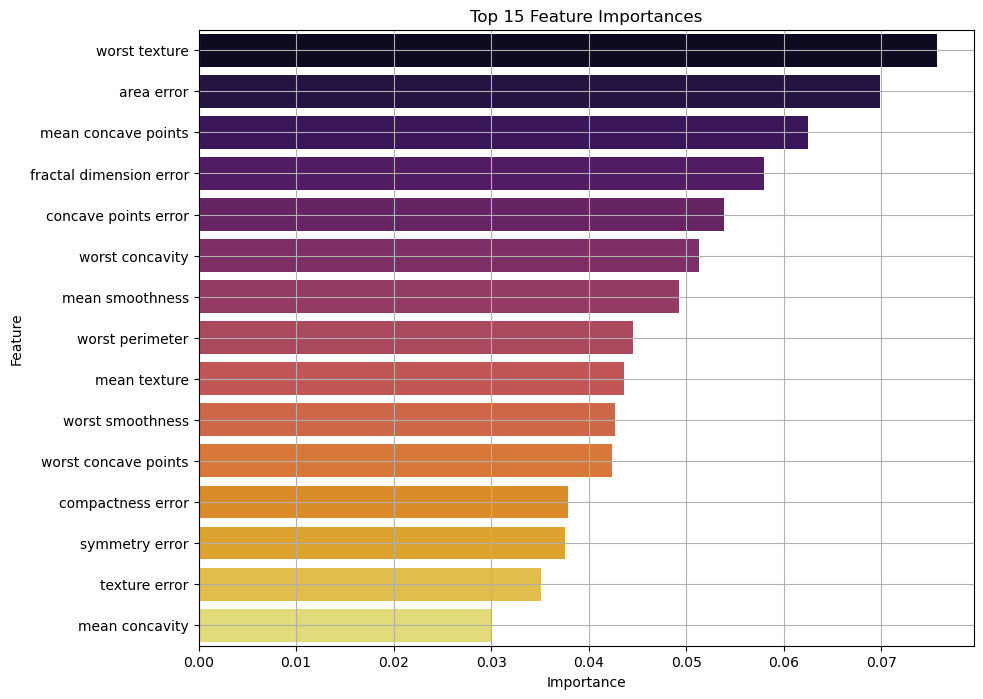

In [84]:
# Updated, more efficient and universally applicable "Feature Importances" plot, which uses a dataframe, rather than piecemeal bits and indices;

feature_importances = pd.DataFrame({
    "Feature": X.columns
    , "Importance": best_ada_boost.feature_importances_
}).sort_values(
    by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x="Importance", y="Feature"
    , data=feature_importances.head(15)
    , palette="inferno"
)

plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show();

In [41]:
# Temporarily suppress duplicate outputs (have to do this w/ px otherwise, it will output dupe charts!)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

In [42]:
# And now - with plotly express!

import plotly.express as px

# Create a dataframe for feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns
    , "Importance": best_ada_boost.feature_importances_
}).sort_values(
    by="Importance"
    , ascending=False)

# Select the top 15 features
top_features = feature_importances.head(15)

# Create the bar chart
fig = px.bar(
    top_features
    , x="Importance"
    , y="Feature"
    , orientation="h"  # Horizontal bar chart
    , title="Top 15 Feature Importances"
    , color="Importance"  # Add color based on importance
    , color_continuous_scale="viridis_r"  # Match the seaborn palette
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Importance"
    , yaxis_title="Feature"
    , yaxis=dict(
        autorange="reversed")  # Reverse the y-axis for a similar order to Seaborn
    , template="seaborn"  # Clean background style
)

# Show the figure
fig.show()

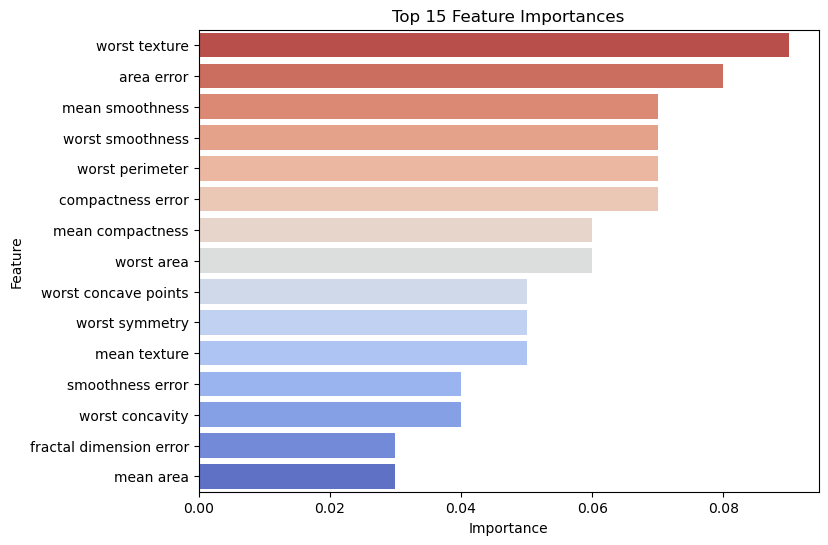

In [16]:
# Feature Importance
importances = grid_search.best_estimator_.feature_importances_
feat_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 15

plt.figure(figsize=(8,6))
sns.barplot(
    x=importances[indices][:top_n]
    , y=np.array(feat_names)[indices][:top_n]
    , palette='coolwarm_r'
)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show();

In [48]:
confusion_matrix(y_test, y_pred)

array([[38,  4],
       [ 0, 72]])